In [54]:
import sys
sys.path.append('../')
from output_utils import *

In [55]:
runs = getruns()

In [56]:
pd.options.display.float_format = '{:,.2f}'.format

In [59]:
runsdf = pd.DataFrame(runs)
runsdf.sort_values('test', ascending=False)[['task', 'model', 'test', 'train', 'softmax', 'loss', 'load_path', 'epochs', 'load_path_convert', 'competitiontype', 'inhibitstrength', 'pools', 'lat_constraints', 'dir']]

,task,model,test,train,softmax,loss,load_path,epochs,load_path_convert,competitiontype,inhibitstrength,pools,lat_constraints,dir
29,MNIST,CNN,97.55,97.23,False,mse,,5,,none,0.00,mm,[],results/EP/mse/2023-07-18/14-48-45_gpu0/
5,MNIST,CNN,96.90,96.34,True,cel,,5,,none,0.00,mm,[],results/EP/cel/2023-07-18/11-09-06_gpu0/
17,MNIST,LateralCNN,96.60,96.20,False,cel,,5,results/EP/mse/2023-07-18/14-48-45_gpu0/,none,0.00,mm,[zerodiag+transposesymmetric],results/EP/cel/2023-07-20/12-03-38_gpu1/
30,MNIST,LatSoftCNN,96.29,95.87,False,mse,,5,,feature_inner_products,1.00,mm,[],results/EP/mse/2023-07-18/14-53-22_gpu1/
25,MNIST,LatSoftCNN,96.24,95.42,False,mse,,5,,feature_inner_products,1.00,mm,[],results/EP/mse/2023-07-18/14-16-39_gpu0/
21,MNIST,CNN,96.16,95.45,False,mse,,5,,none,0.00,mm,[],results/EP/mse/2023-07-18/14-48-45_gpu0_copy_5...
28,MNIST,CNN,95.93,95.21,True,mse,,5,,none,0.00,mm,[],results/EP/mse/2023-07-18/13-44-34_gpu1/
23,MNIST,CNN,95.89,95.42,False,mse,,5,,none,0.00,mm,[],results/EP/mse/2023-07-18/13-44-49_gpu1/
26,MNIST,CNN,95.88,95.06,True,mse,,5,,none,0.00,mm,[],results/EP/mse/2023-07-18/14-16-49_gpu0/
24,MNIST,LatSoftCNN,95.82,94.83,False,mse,,5,,feature_inner_products,1.00,mm,[],results/EP/mse/2023-07-18/13-44-20_gpu0/


In [80]:
path = 'results/EP/mse/2023-07-18/14-53-22_gpu1/' #'results/EP/cel/2023-07-18/10-31-15_gpu0/'
lattest = runsdf[runsdf['dir'] == path]
latmodel = torch.load(path + 'model.pt')
lattest

,model,task,pools,archi,channels,kernels,strides,paddings,fc,act,...,head_lrs,lat_wds,save_nrn,load_path_convert,convert_place_layers,tensorboard,train,test,dir,call
30,LatSoftCNN,MNIST,mm,"[784, 512, 10]","[32, 64]","[3, 3]","[1, 1]","[0, 1]",[10],mysig,...,[],None,False,,[],True,95.87,96.29,results/EP/mse/2023-07-18/14-53-22_gpu1/,../main.py --task MNIST --model LatSoftCNN --c...


In [62]:
path = 'results/EP/mse/2023-07-18/14-48-45_gpu0/'
controltest = runsdf[runsdf['dir'] == path]
controlmodel = torch.load(path + 'model.pt')
controltest

,model,task,pools,archi,channels,kernels,strides,paddings,fc,act,...,head_lrs,lat_wds,save_nrn,load_path_convert,convert_place_layers,tensorboard,train,test,dir,call
29,CNN,MNIST,mm,"[784, 512, 10]","[32, 64]","[3, 3]","[1, 1]","[0, 1]",[10],mysig,...,[],None,False,,[],True,97.23,97.55,results/EP/mse/2023-07-18/14-48-45_gpu0/,../main.py --task MNIST --model CNN --channels...


In [63]:
import torchvision
import torch.nn.functional as F

In [64]:
mbs = lattest.mbs.item()
T1 = lattest.T1.item()
device = torch.device(lattest.device.item())

In [65]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                                torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('./mnist_pytorch', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=mbs, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('./mnist_pytorch', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=200, shuffle=False, num_workers=0)

In [66]:
def evaluate(model, loader, T, device):
    # Evaluate the model on a dataloader with T steps for the dynamics
    model.eval()
    correct=0
    phase = 'Train' if loader.dataset.train else 'Test'

    for x, y in loader:
        x, y = x.to(device), y.to(device)
        neurons = model.init_neurons(x.size(0), device)
        neurons = model(x, y, neurons, T) # dynamics for T time steps

        if not model.softmax:
            pred = torch.argmax(neurons[-1], dim=1).squeeze()  # in this cas prediction is done directly on the last (output) layer of neurons
        else: # prediction is done as a readout of the penultimate layer (output is not part of the system)
            pred = torch.argmax(F.softmax(model.synapses[-1](neurons[-1].view(x.size(0),-1)), dim = 1), dim = 1).squeeze()

        correct += (y == pred).sum().item()


    acc = correct/len(loader.dataset)
    print(phase+' accuracy :\t', acc)
    return correct


In [68]:
device = torch.device(1)
latmodel = latmodel.to(device)
controlmodel = controlmodel.to(device)

In [69]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [81]:
def attack(model, args, epsilon=0.01, attacks=10):
    mbs = args.mbs.item()
    beta = 0.0
    model = model.to(device)
    
    if args.loss.item()=='mse':
        criterion = torch.nn.MSELoss(reduction='none').to(device)
    elif args.loss.item()=='cel':
        criterion = torch.nn.CrossEntropyLoss(reduction='none').to(device)
    
    T = 40
    
    attackxs = []
    origxs = []
    origpreds = []
    attackedpreds = []
    truthlabels = []
    for s in range(attacks):
        x, y = next(iter(train_loader))
        x = x.to(device)
        x = x.requires_grad_()

        y = y.to(device)
    
    
        neurons = model.init_neurons(mbs, device)
        neurons = model(x, y, neurons, T, beta, criterion, check_thm=True) # check_thm True so grads are retaiend
        
        if args.softmax.item():
            # the prediction is made with softmax[last weights[penultimate layer]]
            pred = model.synapses[-1](neurons[-1].view(mbs,-1))
        else:
            pred = neurons[-1]
        
        origcorrect = torch.eq(pred.max(1).indices, y)
        print('original acc : ', (torch.sum(origcorrect)/mbs).item(), end='\t')

        
        if criterion.__class__.__name__.find('MSE')!=-1:
            L = 0.5*criterion(pred.float(), F.one_hot(y, num_classes=model.nc).float()).sum(dim=1).squeeze()
        else:
            L = criterion(pred.float(), y).squeeze()
        
        model.zero_grad()
        L.sum().backward()
        attackx = fgsm_attack(x, epsilon, x.grad)
        
        
        neurons = model.init_neurons(mbs, device)
        neurons = model(attackx, y, neurons, T, beta, criterion, check_thm=True) # check_thm True so grads are retaiend
        
        if args.softmax.item():
            # the prediction is made with softmax[last weights[penultimate layer]]
            attackpred = model.synapses[-1](neurons[-1].view(mbs,-1))
        else:
            attackpred = neurons[-1]
        
        attackedcorrect = torch.eq(attackpred.max(1).indices, y)
        print('attacked acc : ', (torch.sum(attackedcorrect)/mbs).item())
        
        attacksuccess = torch.logical_and(False == attackedcorrect, True == origcorrect)
        attackxs.append(attackx[attacksuccess].data)
        origxs.append(x[attacksuccess].data)
        origpreds.append(pred[attacksuccess].data)
        attackedpreds.append(attackpred[attacksuccess].data)
        truthlabels.append(y[attacksuccess].data)
            
    return attackxs, origxs, attackedpreds, origpreds, truthlabels

In [82]:
def showattacks(attackx, x, attackpreds, origpreds):
    fig, axs = plt.subplots(1, len(attackx), figsize=(10,1))
    plt.ylabel("original")
    for idx in range(len(attackx)):
        axs[idx].imshow(x[idx][0][0].data.cpu())
        axs[idx].set_title("pred:" + str(origpreds[idx].max(1).indices[0].data.item()))

    fig, axs = plt.subplots(1, len(attackx), figsize=(10,1))
    plt.ylabel("attacked")
    for idx in range(len(attackx)):
        axs[idx].imshow(attackx[idx][0][0].data.cpu())
        axs[idx].set_title("pred:" + str(attackpreds[idx].max(1).indices[0].data.item()))

    fig, axs = plt.subplots(1, len(attackx), figsize=(10,1))
    plt.ylabel("diff")
    for idx in range(len(attackx)):
        axs[idx].imshow(attackx[idx][0][0].data.cpu() - x[idx][0][0].data.cpu())
        axs[idx].set_title("pred:" + str(attackpreds[idx].max(1).indices[0].data.item()))

In [83]:
evaluate(latmodel, test_loader, T1, device)

Test accuracy :	 0.9629


9629

In [87]:
attackx, x, attackpreds, origpreds, truthlabels = attack(latmodel, lattest, epsilon=0.5, attacks=10)

original acc :  0.9599999785423279	attacked acc :  0.04999999701976776
original acc :  0.9599999785423279	attacked acc :  0.019999999552965164
original acc :  0.9799999594688416	attacked acc :  0.029999999329447746
original acc :  0.9699999690055847	attacked acc :  0.05999999865889549
original acc :  0.949999988079071	attacked acc :  0.029999999329447746
original acc :  0.9399999976158142	attacked acc :  0.029999999329447746
original acc :  0.9699999690055847	attacked acc :  0.019999999552965164
original acc :  0.9799999594688416	attacked acc :  0.029999999329447746
original acc :  0.9599999785423279	attacked acc :  0.019999999552965164
original acc :  0.9300000071525574	attacked acc :  0.029999999329447746


In [88]:
np.sum([ax.size(0) for ax in attackx])

928

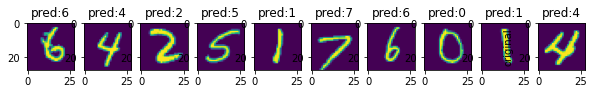

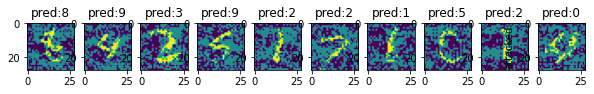

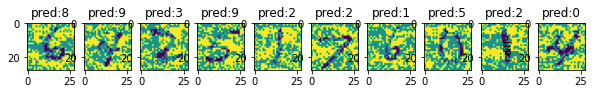

In [89]:
showattacks(attackx, x, attackpreds, origpreds)

In [90]:
evaluate(controlmodel, test_loader, T1, device)

Test accuracy :	 0.9755


9755

In [91]:
attackx, x, attackpreds, origpreds, truthlabels = attack(controlmodel, controltest, epsilon=0.5, attacks=10)

original acc :  0.9699999690055847	attacked acc :  0.0
original acc :  1.0	attacked acc :  0.009999999776482582
original acc :  0.9399999976158142	attacked acc :  0.009999999776482582
original acc :  0.9599999785423279	attacked acc :  0.009999999776482582
original acc :  0.949999988079071	attacked acc :  0.009999999776482582
original acc :  0.9699999690055847	attacked acc :  0.009999999776482582
original acc :  0.9300000071525574	attacked acc :  0.0
original acc :  0.949999988079071	attacked acc :  0.0
original acc :  0.9599999785423279	attacked acc :  0.009999999776482582
original acc :  0.9899999499320984	attacked acc :  0.009999999776482582


In [92]:
np.sum([ax.size(0) for ax in attackx])

955

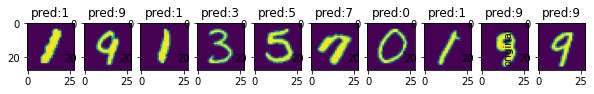

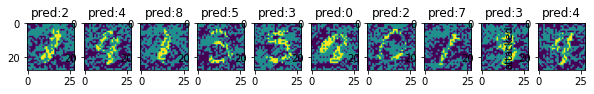

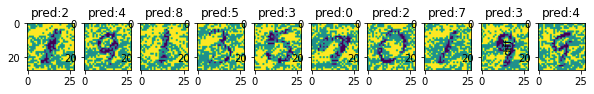

In [93]:
showattacks(attackx, x, attackpreds, origpreds)